In [1]:
import os
import pandas as pd

## Load the datasets and combine them into a single dataframe

In [2]:
!ls ./dataset/Downloaded/

amh_dev.csv    ary_train.csv  hau_dev.csv    mar_train.csv
amh_train.csv  eng_dev.csv    hau_train.csv  tel_dev.csv
ary_dev.csv    eng_train.csv  mar_dev.csv    tel_train.csv


In [3]:
base_path = "./dataset/Downloaded"

In [4]:
combine_data = pd.DataFrame()

for file in os.listdir(base_path):

    lang, type = file.split(".")[0].split("_")
    print(lang, type)
    data = pd.read_csv(f"{base_path}/{file}")

    processed = False
    try:
        data["Text1"], data["Text2"] = list(zip(*data.Text.apply(lambda ele: ele.split("\t")).values))
        processed = True
    except Exception:
        pass
        
    try:
        if not processed:
            data["Text1"], data["Text2"] = list(zip(*data.Text.apply(lambda ele: ele.split("\n")).values))
            processed = True
    except Exception:
        pass

    # try:
    if not processed:
        data["Text1"], data["Text2"] = list(zip(*data.Text.apply(lambda ele: ele.split("\\n")).values))
        
    data.drop(columns=["Text", "PairID"], inplace=True)

    data["Type"] = [type] * data.shape[0]
    data["Lang"] = [lang] * data.shape[0]

    if type == "dev":
        # If its dev we wont have the data labels, give it as zero else use the scores provided
        data["Scores"] = [0] * data.shape[0]
    else:
        data["Scores"] = data["Score"].values
        data.drop(columns = ["Score"], inplace=True)

    combine_data = pd.concat((combine_data, data))

combine_data.reset_index(inplace=True, drop=True)

eng train
tel train
tel dev
amh train
hau train
eng dev
ary train
hau dev
ary dev
mar dev
mar train
amh dev


In [6]:
combine_data

,Text1,Text2,Type,Lang,Scores
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",train,eng,1.0
1,A black dog running through water.,A black dog is running through some water.,train,eng,1.0
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,train,eng,1.0
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",train,eng,1.0
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",train,eng,1.0
...,...,...,...,...,...
12698,ይሖዋ “የእውነት አምላክ ” ነው ።,እንዲህ ማድረግ የሚችለው ደግሞ ይሖዋ አምላክ ብቻ ነው ።,dev,amh,0.0
12699,ክረምትና በጋ በምስራቅ አፍሪካ ።,በብዛት በምስራቅ አፍሪካ ይገኛሉ ።,dev,amh,0.0
12700,ይህን ያህል እርግጠኛ እንዲሆን ያደረገው ምንድን ነው ?,ደስተኛ እንዲሆን አስተዋጽኦ ያደረገው ምንድን ነው ?,dev,amh,0.0
12701,ያ የበላ ሰው ከሕዝቡ መካከል ተለይቶ ይጠፋልና ።,መንግስት ግን ፣ “ለእርዳታ የተመደበ ገንዘብ ነው” ሊል ይችላል ።,dev,amh,0.0


In [7]:
combine_data.Lang.unique()

array(['eng', 'tel', 'amh', 'hau', 'ary', 'mar'], dtype=object)

In [8]:
combine_data[combine_data.isna().any(axis=1)]

,Text1,Text2,Type,Lang,Scores


In [9]:
combine_data

,Text1,Text2,Type,Lang,Scores
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",train,eng,1.0
1,A black dog running through water.,A black dog is running through some water.,train,eng,1.0
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,train,eng,1.0
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",train,eng,1.0
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",train,eng,1.0
...,...,...,...,...,...
12698,ይሖዋ “የእውነት አምላክ ” ነው ።,እንዲህ ማድረግ የሚችለው ደግሞ ይሖዋ አምላክ ብቻ ነው ።,dev,amh,0.0
12699,ክረምትና በጋ በምስራቅ አፍሪካ ።,በብዛት በምስራቅ አፍሪካ ይገኛሉ ።,dev,amh,0.0
12700,ይህን ያህል እርግጠኛ እንዲሆን ያደረገው ምንድን ነው ?,ደስተኛ እንዲሆን አስተዋጽኦ ያደረገው ምንድን ነው ?,dev,amh,0.0
12701,ያ የበላ ሰው ከሕዝቡ መካከል ተለይቶ ይጠፋልና ።,መንግስት ግን ፣ “ለእርዳታ የተመደበ ገንዘብ ነው” ሊል ይችላል ።,dev,amh,0.0


In [23]:
combine_data.to_csv("./dataset/Processed_Dataset_Combined.csv", index=False)

In [24]:
combine_data

,Text1,Text2,Type,Lang,Scores
0,"It that happens, just pull the plug.","if that ever happens, just pull the plug.",train,eng,1.0
1,A black dog running through water.,A black dog is running through some water.,train,eng,1.0
2,I've been searchingthe entire abbey for you.,I'm looking for you all over the abbey.,train,eng,1.0
3,If he is good looking and has a good personali...,"If he's good looking, and a good personality, ...",train,eng,1.0
4,"She does not hate you, she is just annoyed wit...","She doesn't hate you, she is just annoyed.",train,eng,1.0
...,...,...,...,...,...
12698,ይሖዋ “የእውነት አምላክ ” ነው ።,እንዲህ ማድረግ የሚችለው ደግሞ ይሖዋ አምላክ ብቻ ነው ።,dev,amh,0.0
12699,ክረምትና በጋ በምስራቅ አፍሪካ ።,በብዛት በምስራቅ አፍሪካ ይገኛሉ ።,dev,amh,0.0
12700,ይህን ያህል እርግጠኛ እንዲሆን ያደረገው ምንድን ነው ?,ደስተኛ እንዲሆን አስተዋጽኦ ያደረገው ምንድን ነው ?,dev,amh,0.0
12701,ያ የበላ ሰው ከሕዝቡ መካከል ተለይቶ ይጠፋልና ።,መንግስት ግን ፣ “ለእርዳታ የተመደበ ገንዘብ ነው” ሊል ይችላል ።,dev,amh,0.0


## Perform some analysis on the dataset

In [10]:
# The distribution of each of the languages in both training and dev datasets
combine_data[["Type", "Lang"]].value_counts(subset=["Lang", "Type"])

Lang  Type 
eng   train    5500
hau   train    1736
mar   train    1200
tel   train    1170
ary   train    1000
amh   train     992
mar   dev       300
eng   dev       250
hau   dev       212
tel   dev       130
ary   dev       118
amh   dev        95
Name: count, dtype: int64

In [11]:
arr = []
for lang, check_df in combine_data[["Type", "Lang"]].value_counts(subset=["Lang", "Type"]).groupby(by="Lang"):
    print(lang)
    use_this = check_df.values
    arr.append({"Lang":lang, "TrainSet": use_this[0], "DevSet": use_this[1]})

amh
ary
eng
hau
mar
tel


<Axes: ylabel='Lang'>

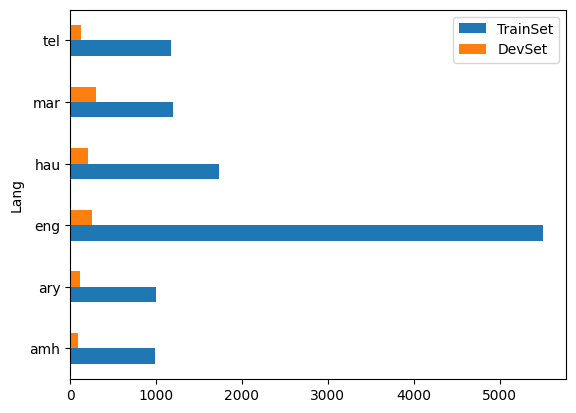

In [12]:
pd.DataFrame(arr).plot(x="Lang", y=["TrainSet", "DevSet"], kind="barh")

array([[<Axes: title={'center': 'Scores'}>]], dtype=object)

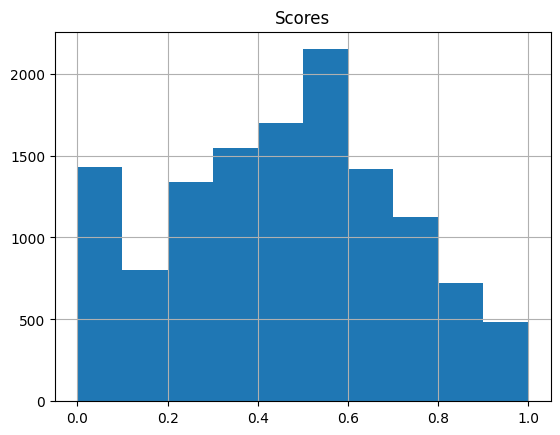

In [13]:
combine_data.hist()